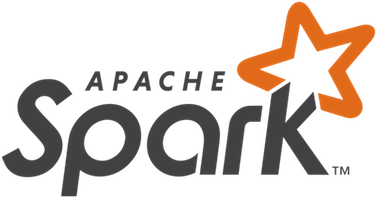
# Apache Spark
* Apache Spark is an analytics engine and framework to perform cluster computing. The inherent nature of Spark is parallel processing which allows it to complete the tasks in the fastest way possible. 
* Spark is **polyglot** which means it can be run on top of many programming languages such as Java, Scala, Python, and R.
* Spark runs everywhere. Spark runs on Hadoop, Apache Mesos, Kubernetes, standalone, or in the cloud. It can access diverse data sources.
* Spark uses DAG (Directed Acyclic Graph) to schedule tasks.

[Reference](https://spark.apache.org/)



## Spark Session
* The entry point to programming Spark with the Dataset and DataFrame API.
* Spark Session helps us to create and manipulate DataFrames.

In [1]:
'''Install pyspark'''
!pip install pyspark

     |████████████████████████████████| 204.7 MB 16 kB/s 
     |████████████████████████████████| 198 kB 36.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044182 sha256=2e622aa16542a7a50188ed8bf7ab07f8796e68262610a5198dde4456ed42b9c6
  Stored in directory: /root/.cache/pip/wheels/4e/c5/36/aef1bb711963a619063119cc032176106827a129c0be20e301
Successfully built pyspark


In [2]:
import math
import numpy as np 
import pandas as pd  
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col, isnull, asc, desc, mean

'''Create a spark session'''
spark = SparkSession.builder.master("local").appName("DataWrangling").getOrCreate()
'''Set this configuration to get output similar to pandas'''
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

In [3]:
df = spark.read.csv('../input/titanic/train.csv',header=True)
df.limit(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+

In [4]:
'''Find the count of a dataframe'''
df.count()

891

# Count of values in a column

In [5]:
df.groupBy('Sex').count()

+------+-----+
|   Sex|count|
+------+-----+
|female|  314|
|  male|  577|
+------+-----+

# Find distinct values of a column in a dataframe

In [6]:
df.select('Embarked').distinct()

+--------+
|Embarked|
+--------+
|       Q|
|    null|
|       C|
|       S|
+--------+

# Select specific set of columns in a dataframe

In [7]:
'''Select a single column'''
df.select('Survived').limit(2)

+--------+
|Survived|
+--------+
|       0|
|       1|
+--------+

In [8]:
df.select('Survived', 'Age', 'Ticket').limit(5)

+--------+---+----------------+
|Survived|Age|          Ticket|
+--------+---+----------------+
|       0| 22|       A/5 21171|
|       1| 38|        PC 17599|
|       1| 26|STON/O2. 3101282|
|       1| 35|          113803|
|       0| 35|          373450|
+--------+---+----------------+

# Find the count of missing values

In [9]:
'''Find the count of missing values'''
df.select([count(when(isnull(column), column)).alias(column) for column in df.columns])

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+

# Filtering null and not null values

In [10]:
'''Find not null values of 'Age' '''
df.filter(col('Age').isNotNull()).limit(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+

In [11]:
'''Another way to find not null values of 'Age' '''
df.filter("Age is not NULL").limit(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+

In [12]:
'''Find the null values of 'Age' '''
df.filter(col('Age').isNull()).limit(5)

+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|330877|8.4583| null|       Q|
|         18|       1|     2|Williams, Mr. Cha...|  male|null|    0|    0|244373|    13| null|       S|
|         20|       1|     3|Masselmani, Mrs. ...|female|null|    0|    0|  2649| 7.225| null|       C|
|         27|       0|     3|Emir, Mr. Farred ...|  male|null|    0|    0|  2631| 7.225| null|       C|
|         29|       1|     3|"O'Dwyer, Miss. E...|female|null|    0|    0|330959|7.8792| null|       Q|
+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+

In [13]:
'''Another way to find null values of 'Age' '''
df.filter("Age is NULL").limit(5)

+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|330877|8.4583| null|       Q|
|         18|       1|     2|Williams, Mr. Cha...|  male|null|    0|    0|244373|    13| null|       S|
|         20|       1|     3|Masselmani, Mrs. ...|female|null|    0|    0|  2649| 7.225| null|       C|
|         27|       0|     3|Emir, Mr. Farred ...|  male|null|    0|    0|  2631| 7.225| null|       C|
|         29|       1|     3|"O'Dwyer, Miss. E...|female|null|    0|    0|330959|7.8792| null|       Q|
+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+

# Filling in missing values

In [14]:
'''Find the mean of the column "Age" '''
mean_ = df.select(mean(col('Age'))).take(1)[0][0]
mean_ = math.ceil(mean_)

In [15]:
'''Find the value counts of Cabin and select the mode'''
df.groupBy(col('Cabin')).count().sort(desc("count")).limit(5)

+-----------+-----+
|      Cabin|count|
+-----------+-----+
|       null|  687|
|    B96 B98|    4|
|         G6|    4|
|C23 C25 C27|    4|
|         F2|    3|
+-----------+-----+

In [16]:
'''Find the mode of'''
embarked_mode = df.groupBy(col('Embarked')).count().sort(desc("count")).take(1)[0][0]

In [17]:
'''Fill the missing values'''
df = df.fillna({'Age':mean_,'Cabin':'C23','Embarked':embarked_mode})

# Dropping columns

In [18]:
'''Drop a single column'''
df.drop('Age').limit(5)

+-----------+--------+------+--------------------+------+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|    1|    0|       A/5 21171|   7.25|  C23|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|    0|    0|STON/O2. 3101282|  7.925|  C23|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|    0|    0|          373450|   8.05|  C23|       S|
+-----------+--------+------+--------------------+------+-----+-----+----------------+-------+-----+--------+

In [19]:
'''Drop multiple columns'''
df.drop('Age', 'Parch','Ticket').limit(5)

+-----------+--------+------+--------------------+------+-----+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|SibSp|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+-----+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|    1|   7.25|  C23|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|    1|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|    0|  7.925|  C23|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|    1|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|    0|   8.05|  C23|       S|
+-----------+--------+------+--------------------+------+-----+-------+-----+--------+

# Sorting columns

In [20]:
'''Sort age in descending order'''
df.sort(desc('Age')).limit(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|    Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------+-------+-----+--------+
|        183|       0|     3|Asplund, Master. ...|  male|  9|    4|    2|    347077|31.3875|  C23|       S|
|        148|       0|     3|"Ford, Miss. Robi...|female|  9|    2|    2|W./C. 6608| 34.375|  C23|       S|
|        166|       1|     3|"Goldsmith, Maste...|  male|  9|    0|    2|    363291| 20.525|  C23|       S|
|        490|       1|     3|"Coutts, Master. ...|  male|  9|    1|    1|C.A. 37671|   15.9|  C23|       S|
|        481|       0|     3|Goodwin, Master. ...|  male|  9|    5|    2|   CA 2144|   46.9|  C23|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+----------+-------+-----+--------+

In [21]:
'''Sort "Parch" column in ascending order and "Age" in descending order'''
df.sort(asc('Parch'),desc('Age')).limit(5)

+-----------+--------+------+--------------------+----+----+-----+-----+--------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name| Sex| Age|SibSp|Parch|  Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+----+----+-----+-----+--------+-------+-----+--------+
|        631|       1|     1|Barkworth, Mr. Al...|male|  80|    0|    0|   27042|     30|  A23|       S|
|        852|       0|     3| Svensson, Mr. Johan|male|  74|    0|    0|  347060|  7.775|  C23|       S|
|         97|       0|     1|Goldschmidt, Mr. ...|male|  71|    0|    0|PC 17754|34.6542|   A5|       C|
|        494|       0|     1|Artagaveytia, Mr....|male|  71|    0|    0|PC 17609|49.5042|  C23|       C|
|        117|       0|     3|Connors, Mr. Patrick|male|70.5|    0|    0|  370369|   7.75|  C23|       Q|
+-----------+--------+------+--------------------+----+----+-----+-----+--------+-------+-----+--------+

# Groupby and aggregation

In [22]:
'''Finding the mean age of male and female'''
df.groupBy('Sex').agg(mean('Age'))

+------+------------------+
|   Sex|          avg(Age)|
+------+------------------+
|female| 28.26751592356688|
|  male|30.570485268630854|
+------+------------------+

In [23]:
'''Finding the mean Fare of male and female'''
df.groupBy('Sex').agg(mean('Fare'))

+------+------------------+
|   Sex|         avg(Fare)|
+------+------------------+
|female| 44.47981783439487|
|  male|25.523893414211418|
+------+------------------+